In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os
import sys

In [2]:
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from ams_jetcis.scripts import sensor_script_example as scripts
import ams_jetcis.characterization.stats_engine.stats as stats

In [3]:
sensor_name = 'Mira050'

Open card:
Current sensor loaded: mira220
Current jetpack loaded: 4.6
Current kernel loaded: Linux-4.9.253-tegra-aarch64-with-Ubuntu-18.04-bionic
Correct sensor driver loaded
Reset sensor low
Reset sensor high 
Mira220 detected with ID 01:0C:2D:05:0B:04:E5:07
(20, 1400, 1600)


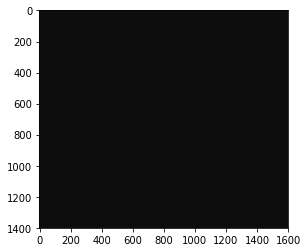

mean [DN]: 208.735
FPN [DN]: 2.364
row FPN [DN]: 0.839
col FPN [DN]: 0.480
Noise [DN]: 2.315
Row noise [DN]: 0.383


In [4]:
for port in scripts.get_port():
    sensor = scripts.select_sensor(sensor_name, port)
    sensor.cold_start()
    sensor.init_sensor()
    sensor.set_exposure_us(10)
    
    imgs = sensor.imager.grab_images(50)
    print(imgs.shape)
    plt.imshow(imgs[0], cmap=plt.get_cmap('gray'), vmin = 0, vmax = (1 << sensor.bpp) - 1)          
    plt.show()
    
    df = stats.agg_results(imgs)

In [7]:
df

,Mean [DN],Total FPN [DN],Pix FPN [DN],Col FPN [DN],Row FPN [DN],Total Temp Noise [DN],Pix Temp Noise [DN],Col Temp Noise [DN],Row Temp Noise [DN]
0,208.735,2.304,2.094,0.476,0.837,2.422,2.109,0.635,1.01
